In [38]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.multiclass import OneVsRestClassifier
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display, HTML
from sklearn.model_selection import GridSearchCV
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('human_resources_data.csv')
display(df.head())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,output
0,0.002420,0.003375,0.012735,0.999708,0.019103,0.0,0.0,0.0,0.006368,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.003052,0.003281,0.019075,0.999539,0.022890,0.0,0.0,0.0,0.000000,0.003815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.000404,0.003234,0.025724,0.999549,0.014699,0.0,0.0,0.0,0.000000,0.003675,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.003227,0.003899,0.022410,0.999475,0.022410,0.0,0.0,0.0,0.004482,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.002326,0.003270,0.012575,0.999715,0.018863,0.0,0.0,0.0,0.006288,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [35]:
from sklearn.model_selection import train_test_split

# split up the training and test data before we start doing anything so we don't generate bias in the experiments
X_train, X_test, y_train, y_test = train_test_split(df.ix[:,:-1], df.ix[:,-1:], test_size=0.3, random_state=42)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

X_train.shape
X_test.shape
y_train.shape

(10499, 19)

(4500, 19)

(10499,)

In [36]:
tuned_parameters = [{'hidden_layer_sizes': [(3, 2), (4, 2), (5, 2), (6, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2)]}]
ann_clf = GridSearchCV(MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1), tuned_parameters, cv=10)
ann_clf.fit(X_train, y_train)
ann_optimized = ann_clf.best_estimator_
print(ann_clf.best_params_)

GridSearchCV(cv=10, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'hidden_layer_sizes': [(3, 2), (4, 2), (5, 2), (6, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2)]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

{'hidden_layer_sizes': (4, 2)}


In [43]:
import time

ann_optimized.fit(X_train, y_train)
ann_optimized.score(X_test, y_test)

start_ann_fit = time.time()
ann_optimized.fit(X_train, y_train)
end_ann_fit = time.time()
ann_optimized.score(X_test, y_test)
end_ann_query = time.time()

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(4, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

0.79355555555555557

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(4, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

0.79355555555555557

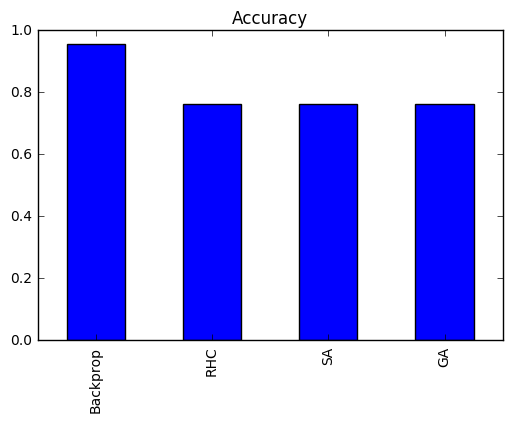

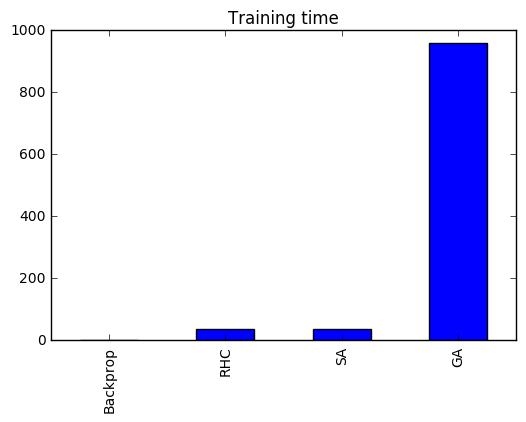

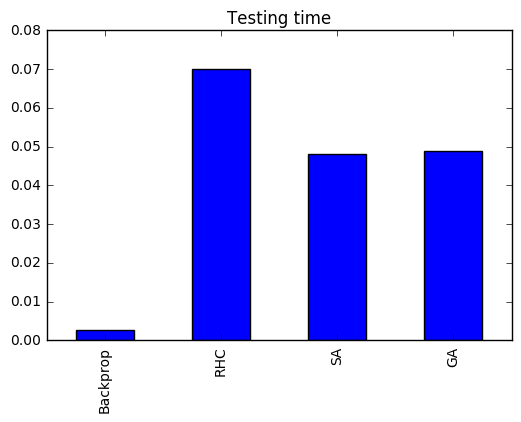

In [48]:
df_results = pd.DataFrame(columns=['Accuracy', 'Training Time', 'Testing Time'], index=['Backprop', 'RHC', 'SA', 'GA'])
df_results['Accuracy'] = [0.957, .762, .762, .762]
df_results['Training Time'] = [end_ann_fit - start_ann_fit, 38.109, 37.998, 958.469]
df_results['Testing Time'] = [end_ann_query - end_ann_fit, 0.070, 0.048, 0.049]

df_results['Accuracy'].plot(kind='bar', title='Accuracy')
plt.show()
df_results['Training Time'].plot(kind='bar', title='Training time')
plt.show()
df_results['Testing Time'].plot(kind='bar', title='Testing time')
plt.show()

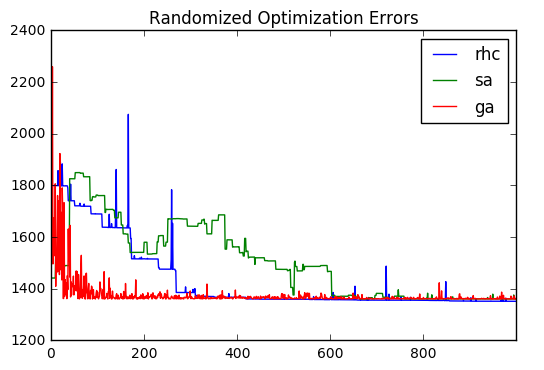

In [47]:
rhc_error = pd.read_csv('rhc_error.csv', header=None)
sa_error = pd.read_csv('sa_error.csv', header=None)
ga_error = pd.read_csv('ga_error.csv', header=None)

errors_df = pd.DataFrame(columns=['rhc', 'sa', 'ga'])
errors_df['rhc'] = rhc_error[0]
errors_df['sa'] = sa_error[0]
errors_df['ga'] = ga_error[0]

errors_df.plot(title='Randomized Optimization Errors')
plt.show()